# Test the Bayesian isochrone code (Dev new funcs)

In [1]:
import numpy as np
import pandas as pd

import os, sys, tqdm, copy, re

import tqdm
import tqdm.notebook

import matplotlib.pyplot as plt
import matplotlib

style = [
    'seaborn-ticks',
    {
        'figure.dpi': 300,
        'font.size': 12,
        'image.cmap': 'inferno',
        'font.family': 'serif',
        'font.serif': ['Times', 'Times New Roman'] + plt.rcParams['font.serif'],
        'xtick.top': True,
        'xtick.direction': 'in',
        'ytick.right': True,
        'ytick.direction': 'in',
        'mathtext.fontset': 'cm'
        }]
plt.style.use(style)

agepro_dir = '/home/dingshandeng/github/DataCalibration/'
sys.path.append(os.path.join(agepro_dir, 'AGE-PRO-analysis/', 'Image_Plots/'))
import sources as ss

import scipy.io

In [2]:
github_dir = '/home/dingshandeng/github/ysoisochrone/'

os.chdir(os.path.join(github_dir, 'tests'))
sys.path.append(os.path.join(github_dir))
sys.path.append(os.path.join(github_dir, 'ysoisochrone_package_dev'))
import ysoisochrone.utils as utils
import ysoisochrone.bayesian

### Download and format the MIST traks

In [3]:
utils.download_mist_v1p2_iso_tracks()

Downloading: |                                                   | 207M/0.00 [01:04<00:00, 3.39MB/s]



Downloaded isochrones_data/MIST_v1p2_iso/MIST_v1p2_tracks.txz
Extracting the tarball to isochrones_data/MIST_v1p2_iso...
Files extracted to isochrones_data/MIST_v1p2_iso
All MIST v1.2 tracks downloaded and extracted in isochrones_data/MIST_v1p2_iso
If you use the MIST tracks, please refer to their webpage: https://waps.cfa.harvard.edu/MIST/index.html


1

In [5]:
# Paths to files
input_file = './isochrones_data/MIST_v1p2_iso/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso'  # Original BHAC15 tracks file
output_mat_file = './isochrones_data/MIST_v1p2_AgeMassGrid_YSO_matrix.mat'  # Output file path

# Read the original BHAC15 tracks file
data_points = utils.read_mist_v1p2_iso_file(input_file)

# Create meshgrid and interpolate the data onto the grid
masses_i, log_age_i, logtlogl_grid, masses_grid, log_age_grid = utils.create_meshgrid(data_points)

# Save the parsed data to a .mat file
utils.save_as_mat(masses_i, log_age_i, logtlogl_grid, output_mat_file)

Data saved to ./isochrones_data/MIST_v1p2_AgeMassGrid_YSO_matrix.mat


1

### Download and format the PARSEC tracks

parsec v2.0

In [3]:
utils.download_parsec_v2p0_tracks()

File downloaded successfully and saved to isochrones_data/PARSECv2p0/PARSECv2p0_tracks.zip
Files extracted to isochrones_data/PARSECv2p0
Downloaded zip file removed after extraction.


1

In [7]:
data_points = utils.read_parsec_v2p0_tab_file(parsec_dir='./isochrones_data/PARSECv2p0/VAR_ROT0.00_SH_Z0.014_Y0.273/')

# Create meshgrid and interpolate the data onto the grid
masses_i, log_age_i, logtlogl_grid, _, _ = utils.create_meshgrid(data_points)

output_mat_file = os.path.join('isochrones_data', 'PARSECv2p0_AgeMassGrid_YSO_matrix.mat')

# Save the parsed data to a .mat file
utils.save_as_mat(masses_i, log_age_i, logtlogl_grid, output_mat_file)
print(f"File saved as: {output_mat_file}")

Data saved to isochrones_data/PARSECv2p0_AgeMassGrid_YSO_matrix.mat
File saved as: isochrones_data/PARSECv2p0_AgeMassGrid_YSO_matrix.mat


In [13]:
'baraffe_n_feiden'.lower()

'baraffe_n_feiden'

In [4]:
2.7e6

2700000.0

parsec v1.2

In [3]:
utils.download_parsec_v1p2_tracks()

Downloading: 100%|██████████████████████████████████████████████| 17.1M/17.1M [00:35<00:00, 505kB/s]



Downloaded isochrones_data/PARSECv1p2/Z0.014Y0.273.tar.gz
Extracting the PARSECv1p2 tarball...
Extracted isochrones_data/PARSECv1p2/Z0.014Y0.273.tar.gz into isochrones_data/PARSECv1p2
All PARSECv1p2 tracks downloaded and extracted in isochrones_data/PARSECv1p2
If you use the PARSEC tracks, please refer to the appropriate papers: https://ui.adsabs.harvard.edu/abs/2012MNRAS.427..127B/abstract as well as the citations mentioned on their webpage: http://stev.oapd.inaf.it/PARSEC/tracks_v12s.html


1

In [3]:
data_points = utils.read_parsec_v1p2_dat_file(parsec_dir='./isochrones_data/PARSECv1p2/Z0.014Y0.273/')

# Create meshgrid and interpolate the data onto the grid
masses_i, log_age_i, logtlogl_grid, _, _ = utils.create_meshgrid(data_points)

output_mat_file = os.path.join('isochrones_data', 'PARSECv1p2_AgeMassGrid_YSO_matrix.mat')

# Save the parsed data to a .mat file
utils.save_as_mat(masses_i, log_age_i, logtlogl_grid, output_mat_file)
print(f"File saved as: {output_mat_file}")

Data saved to isochrones_data/PARSECv1p2_AgeMassGrid_YSO_matrix.mat
File saved as: isochrones_data/PARSECv1p2_AgeMassGrid_YSO_matrix.mat


### Download and format the Feiden2016 tracks (the .iso files)

In [3]:
# utils.download_feiden_tracks()

In [4]:
# data_points = utils.read_feiden_iso_file(feiden_dir='./isochrones_data/Feiden2016_iso/')

# # Create meshgrid and interpolate the data onto the grid
# masses_i, log_age_i, logtlogl_grid, _, _ = utils.create_meshgrid(data_points)

# output_mat_file = os.path.join('isochrones_data', 'Feiden_AgeMassGrid_iso_YSO_matrix.mat')

# # Save the parsed data to a .mat file
# utils.save_as_mat(masses_i, log_age_i, logtlogl_grid, output_mat_file)
# print(f"File saved as: {output_mat_file}")

Data saved to isochrones_data/Feiden_AgeMassGrid_iso_YSO_matrix.mat
File saved as: isochrones_data/Feiden_AgeMassGrid_iso_YSO_matrix.mat


### Read in the trk files from Feiden2016

In [5]:
# utils.download_feiden_trk_tracks()

In [6]:
data_points = utils.read_feiden_trk_file(feiden_dir='./isochrones_data/Feiden2016_trk/')

# Create meshgrid and interpolate the data onto the grid
masses_i, log_age_i, logtlogl_grid, _, _ = utils.create_meshgrid(data_points)

output_mat_file = os.path.join('isochrones_data', 'Feiden_AgeMassGrid_YSO_matrix.mat')

# Save the parsed data to a .mat file
utils.save_as_mat(masses_i, log_age_i, logtlogl_grid, output_mat_file)
print(f"File saved as: {output_mat_file}")

Data saved to isochrones_data/Feiden_AgeMassGrid_YSO_matrix.mat
File saved as: isochrones_data/Feiden_AgeMassGrid_YSO_matrix.mat


In [7]:
data_points = utils.read_feiden_trk_file(feiden_dir='./isochrones_data/Feiden2016_trk_P2016/')

# Create meshgrid and interpolate the data onto the grid
masses_i, log_age_i, logtlogl_grid, _, _ = utils.create_meshgrid(data_points)

output_mat_file = os.path.join('isochrones_data', 'Feiden_trkP2016_AgeMassGrid_YSO_matrix.mat')

# Save the parsed data to a .mat file
utils.save_as_mat(masses_i, log_age_i, logtlogl_grid, output_mat_file)
print(f"File saved as: {output_mat_file}")

Data saved to isochrones_data/Feiden_trkP2016_AgeMassGrid_YSO_matrix.mat
File saved as: isochrones_data/Feiden_trkP2016_AgeMassGrid_YSO_matrix.mat


#### Load the datafile from Python

In [15]:
# Load the saved .mat file
# loaded_data_py = scipy.io.loadmat('./isochrones_data/Feiden_AgeMassGrid_YSO_matrix.mat')
loaded_data_py = scipy.io.loadmat('./isochrones_data/Feiden_trkP2016_AgeMassGrid_YSO_matrix.mat')

# Access the data
masses_py = loaded_data_py['mass'][0]
log_age_py = loaded_data_py['log_age'][0]
logtlogl_py = loaded_data_py['logt_logl']

#### The datafile from IDL

In [16]:
loaded_data_idl = scipy.io.readsav('./isochrones_data/Feiden_AgeMassGrid.sav')
masses_idl = loaded_data_idl['mass']
log_age_idl = loaded_data_idl['log_age']
logtlogl_idl = loaded_data_idl['logt_logl']

### Download and format the Baraffe2015 tracks

In [3]:
utils.download_baraffe_tracks()


Downloaded isochrones_data/Baraffe2015/BHAC15_tracks+structure
If you end up using the Baraffe et al. (2015) tracks, please cite from: https://ui.adsabs.harvard.edu/abs/2015A%26A...577A..42B/abstract


1

In [14]:
# import scipy.io as sio
# from scipy.interpolate import griddata

# # Paths to files
# input_file = './isochrones_data/BHAC15_tracks+structure'  # Original BHAC15 tracks file
# output_mat_file = './isochrones_data/Baraffe_AgeMassGrid_YSO_matrix.mat'  # Output file path

# # Read the original BHAC15 tracks file
# data_points = utils.read_baraffe_file(input_file)

# # Create meshgrid and interpolate the data onto the grid
# masses_i, log_age_i, logtlogl_grid, masses_grid, log_age_grid = utils.create_meshgrid(data_points)

# # Save the parsed data to a .mat file
# utils.save_as_mat(masses_i, log_age_i, logtlogl_grid, output_mat_file)

#### Load the datafile from Python

In [38]:
# Load the saved .mat file
# loaded_data_py = scipy.io.loadmat('./isochrones_data/Baraffe_AgeMassGrid_matrix.mat')
loaded_data_py = scipy.io.loadmat('./isochrones_data/Baraffe_AgeMassGrid_YSO_matrix.mat')

# Access the data
masses_py = loaded_data_py['mass'][0]
log_age_py = loaded_data_py['log_age'][0]
logtlogl_py = loaded_data_py['logt_logl']

#### The datafile from IDL

In [41]:
loaded_data_idl = scipy.io.readsav('./isochrones_data/Baraffe_AgeMassGrid.sav')
masses_idl = loaded_data_idl['mass']
log_age_idl = loaded_data_idl['log_age']
logtlogl_idl = loaded_data_idl['logt_logl']

### Load the AGE-PRO Lupus file

In [8]:
AP_data_dir = '/home/dingshandeng/github/DataCalibration/AGE-PRO-analysis/Data_analysis_n_General_Plots'

df_AP_LP_st = pd.read_csv(AP_data_dir+'/data/Table_AGEPRO_Lupus_stellar_parameters.csv')

file_dir_Manara = os.path.join(github_dir, 'ManaraPPVII-data_and_others/')
agepro_alcala_data = pd.read_csv(os.path.join(file_dir_Manara, 'Alcala+2017_table_A2_stellar_properties - Sheet2.csv'))

teff_err = np.zeros(len(agepro_alcala_data))
luminosity_star_err = np.zeros(len(agepro_alcala_data))
mstar_err = np.zeros(len(agepro_alcala_data))
for ii in agepro_alcala_data.index:
    luminosity_star_err[ii] = np.float64(agepro_alcala_data.loc[ii, 'Lstar (err)[Lsun]'].split('(')[1][0:-1])
    teff_err[ii] = np.float64(agepro_alcala_data.loc[ii, 'Teff (err)[K]'].split('(')[1][0:-1])
    mstar_err[ii] = np.float64(agepro_alcala_data.loc[ii, 'Mstar(S00) (err)[Msun]'].split('(')[1][0:-1])

df_prop = copy.deepcopy(df_AP_LP_st)

# df_prop['Source'] = df_prop['Source']
df_prop['Teff'] = df_prop['Teff_xs']
df_prop['Luminosity'] = df_prop['Lstar_xs_DR3']
df_prop['e_Teff'] = teff_err
df_prop['e_Luminosity'] = luminosity_star_err
# print(df_prop.columns)

# For AGE-PRO UScous targets
toobright = [] # ['0']  
toofaint = [] # ['0']
median_age = 1.0 # Myrs	

# only select part of the data
df_prop = df_prop.loc[:2]

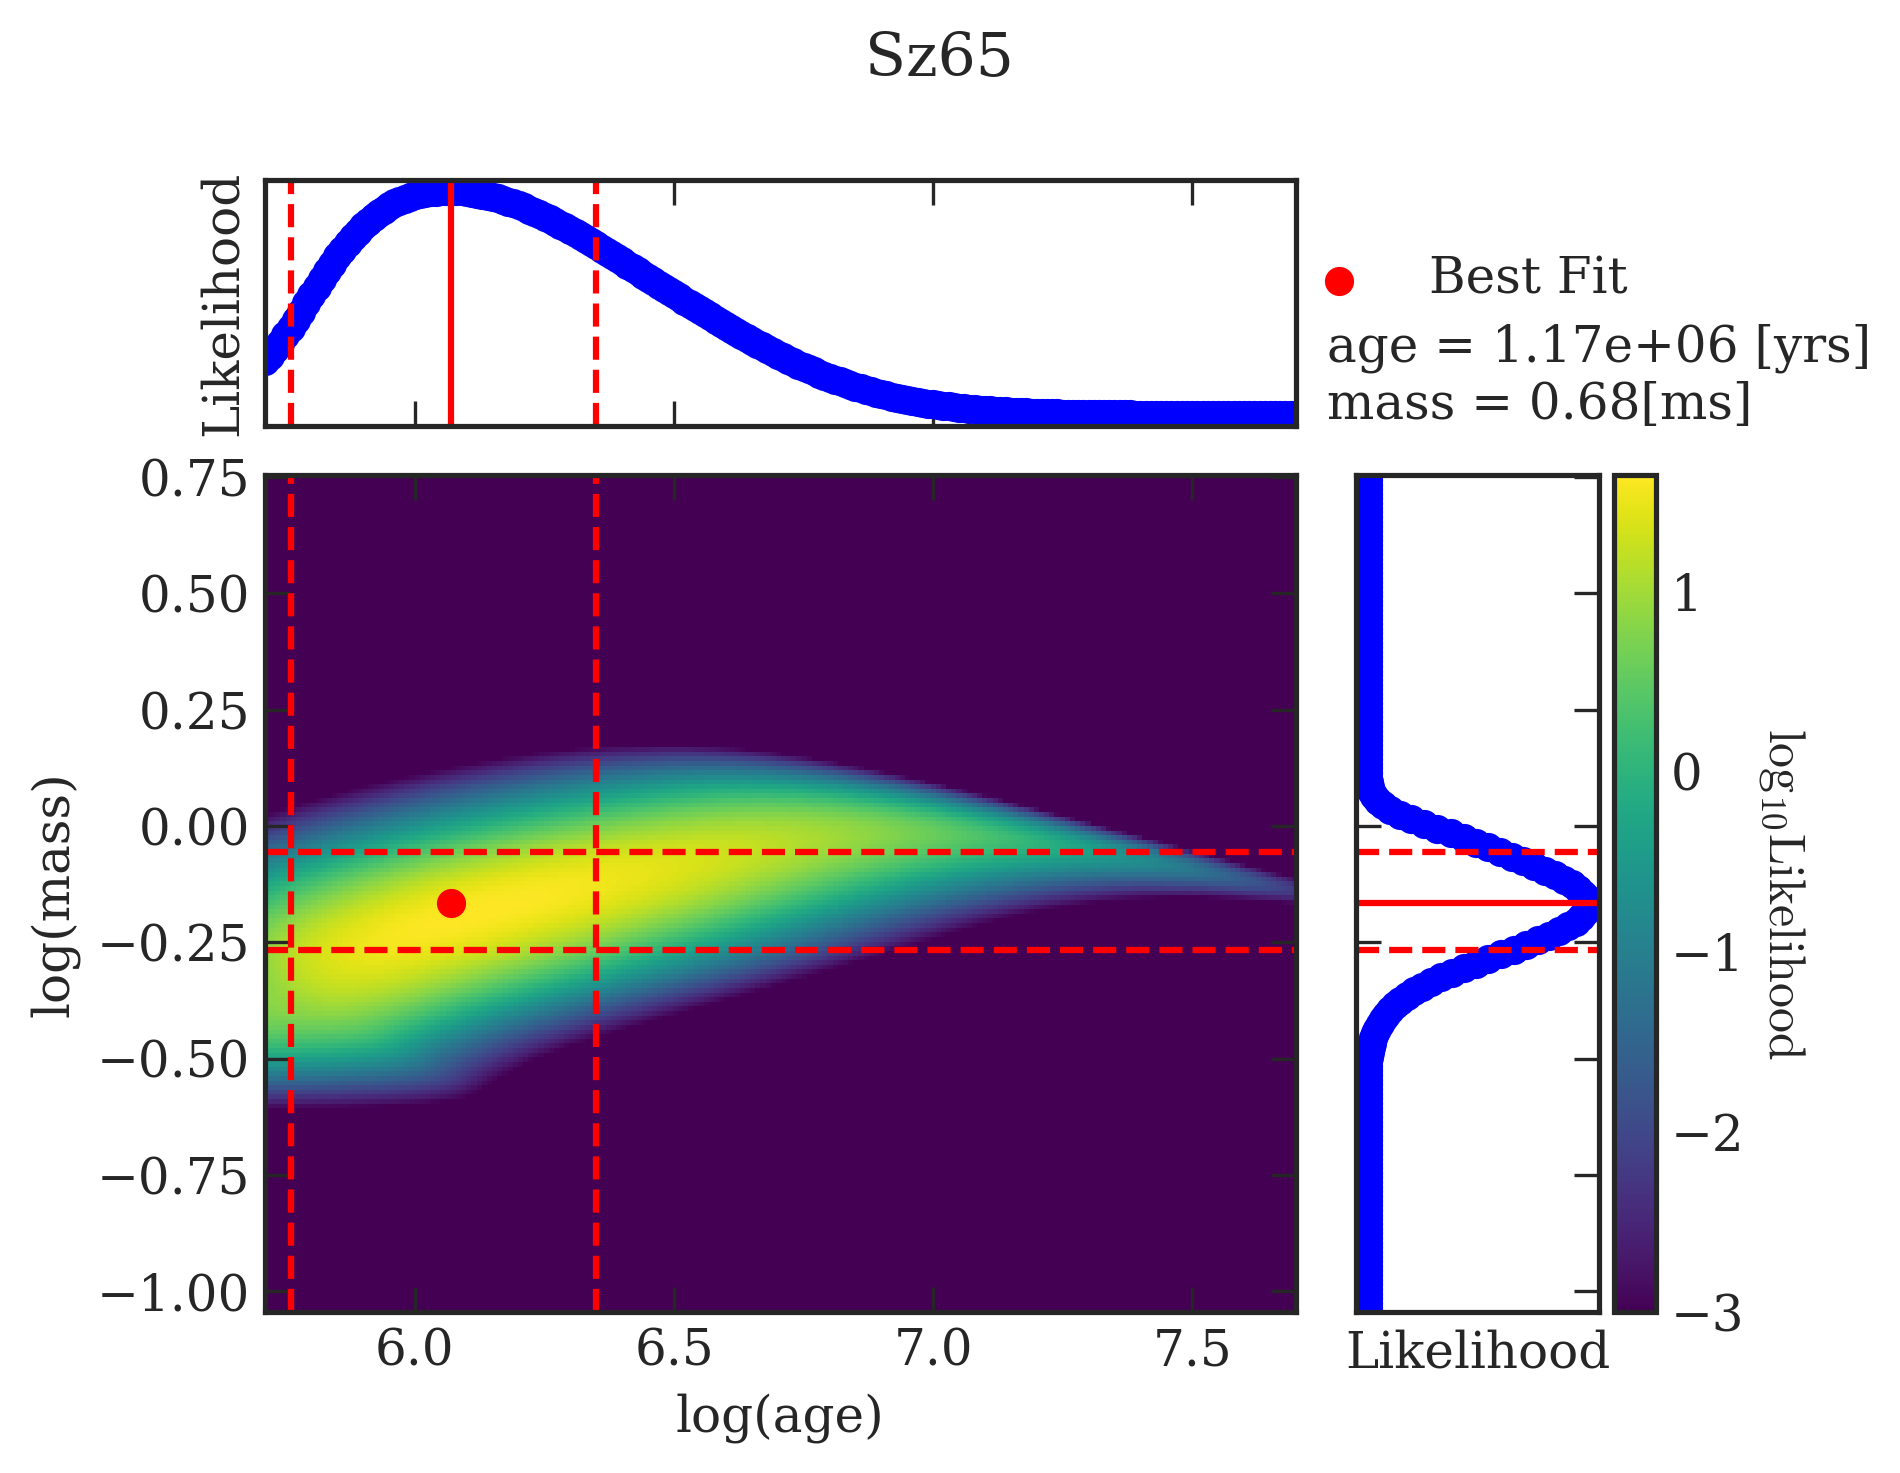

/home/dingshandeng/github/DataCalibration/ysoisochrone_package_dev/ysoisochrone/plotting.py:90: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


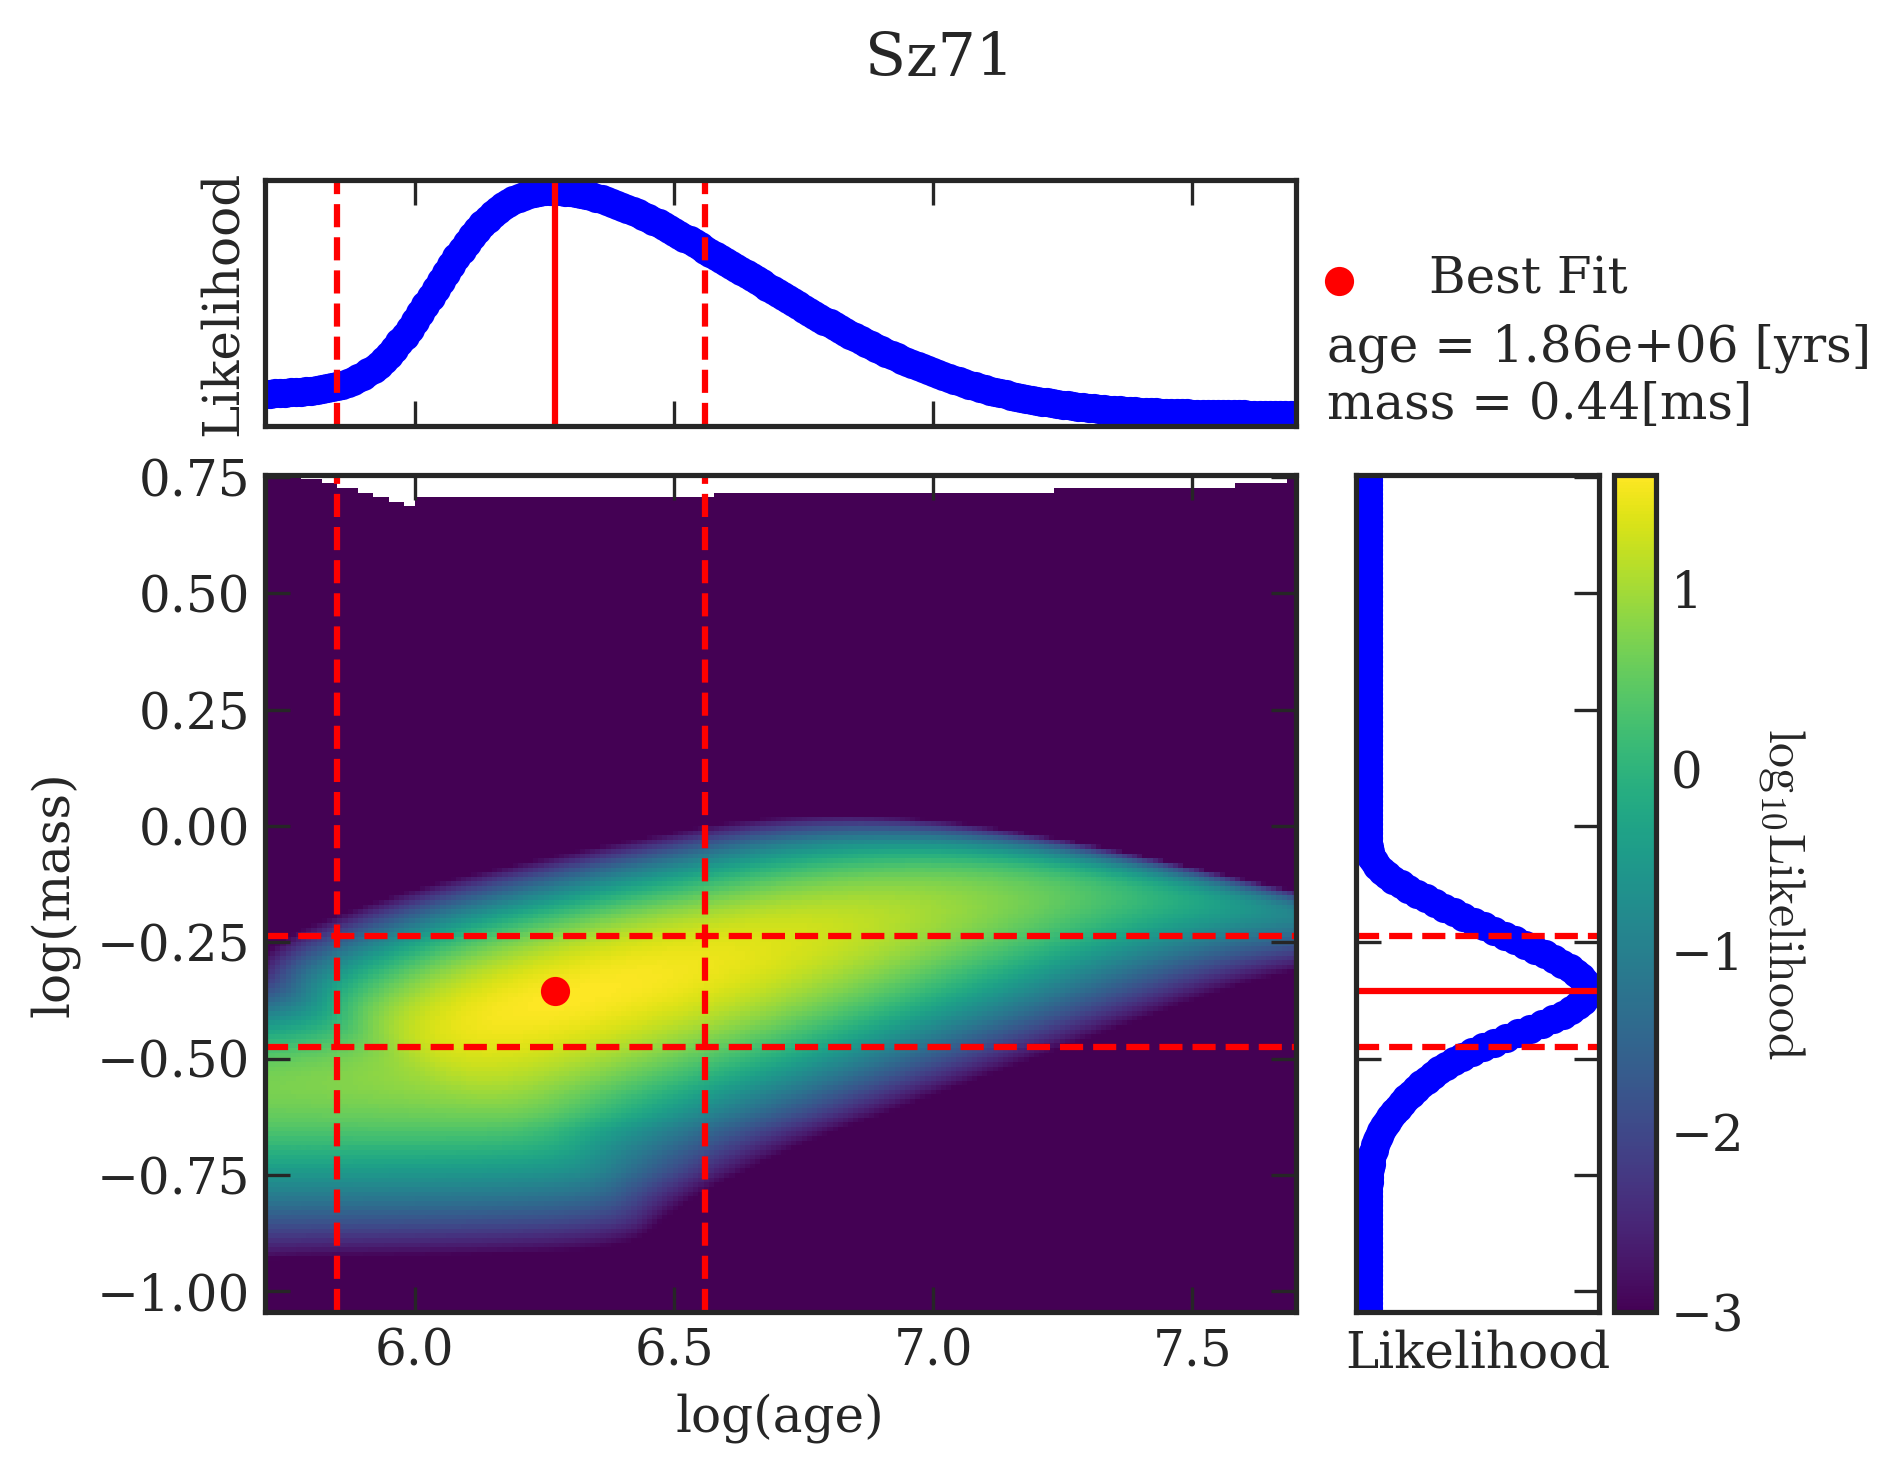

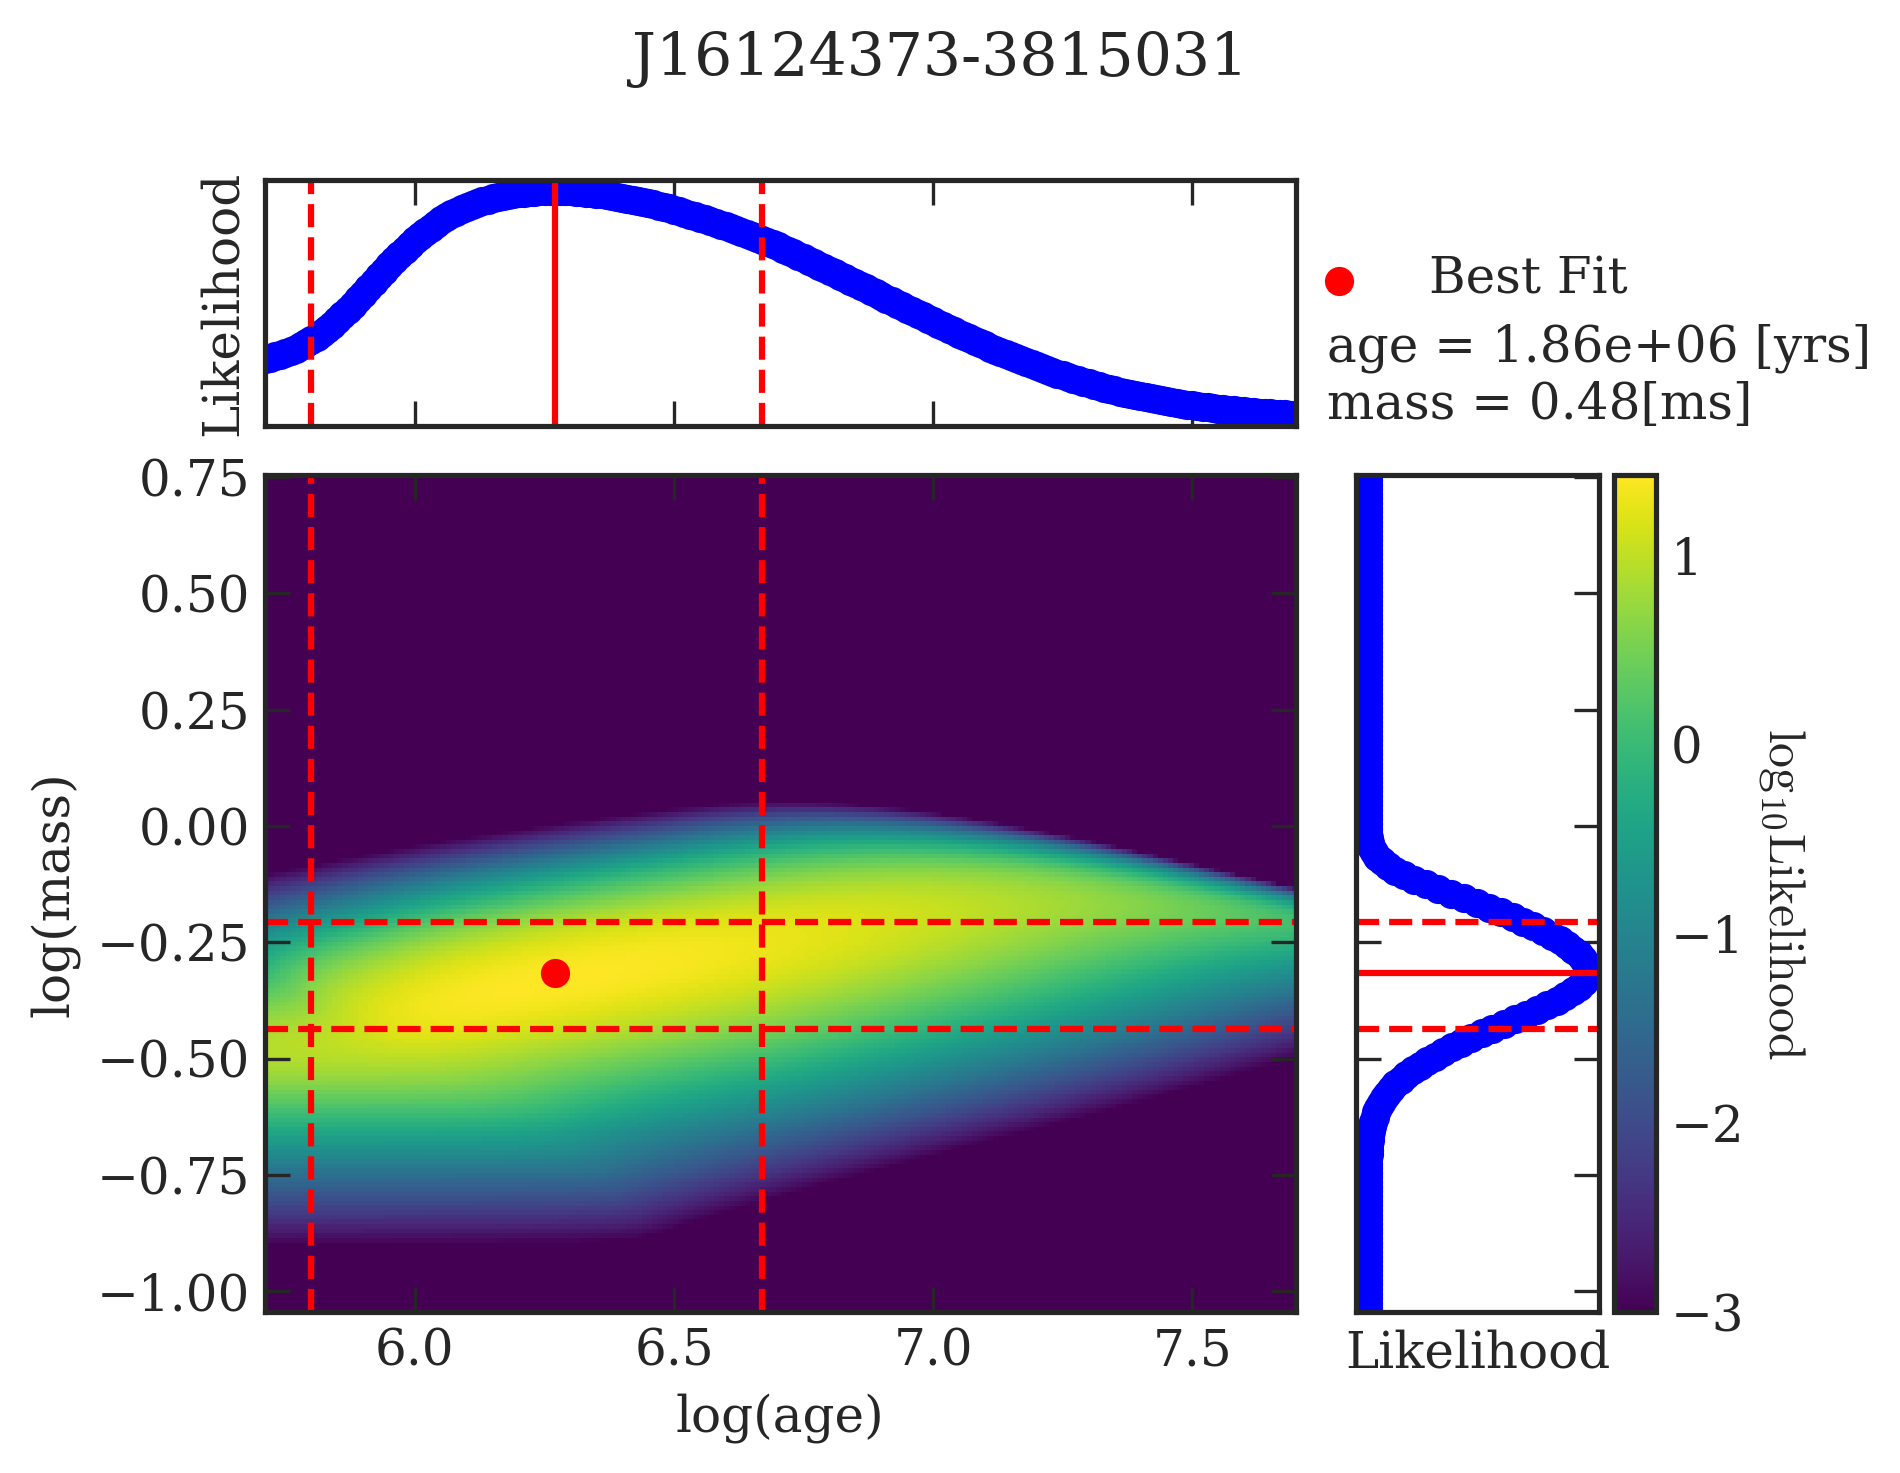

In [10]:
# method can be 
# 'Baraffe2015', 'Feiden2016', 'Pascucci2016'

best_mass_output, best_age_output, lmass_all, lage_all =\
    ysoisochrone.bayesian.derive_stellar_mass_age(df_prop, method='Feiden2016', isochrone_data_dir=None, no_uncertainties=False, plot=True, save_fig=False, save_lfunc=False, fig_save_dir='figures', csv_save_dir='lfunc_data', verbose=False, toofaint=toobright, toobright=toofaint, median_age=median_age)